In [1]:
print("buongiorno sie pisze a nie")

buongiorno sie pisze a nie


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns

## Train test split

In [3]:
train_df = pd.read_csv('training.csv') # split for test and train set is ready
test = pd.read_csv('test.csv')

In [4]:
my_columns = [1,10,11]+(list(range(18, 29))) + [31]
df = train_df.iloc[:,my_columns]

y = df["IsBadBuy"]
X = df.copy()

del X["IsBadBuy"]

In [5]:
train_df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [6]:
test_columns = [10,11]+(list(range(18, 29))) + [31]
test = test.iloc[:, test_columns]
test

,Transmission,WheelTypeID,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,IsOnlineSale
0,AUTO,1.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,0
1,AUTO,1.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,0
2,AUTO,1.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,0
3,AUTO,1.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,0
4,AUTO,NaN,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,AUTO,1.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,0
48703,AUTO,2.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,0
48704,AUTO,2.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,0
48705,AUTO,1.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,0


In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


train = X_train.join(y_train)
val = X_val.join(y_val)

# Data Exploring

Data contains records of some car sales - our goal is to determine whether the bought car is a lemon or not

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58386 entries, 11971 to 57086
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Color                              58380 non-null  object 
 1   Transmission                       58379 non-null  object 
 2   MMRAcquisitionAuctionAveragePrice  58370 non-null  float64
 3   MMRAcquisitionAuctionCleanPrice    58370 non-null  float64
 4   MMRAcquisitionRetailAveragePrice   58370 non-null  float64
 5   MMRAcquisitonRetailCleanPrice      58370 non-null  float64
 6   MMRCurrentAuctionAveragePrice      58138 non-null  float64
 7   MMRCurrentAuctionCleanPrice        58138 non-null  float64
 8   MMRCurrentRetailAveragePrice       58138 non-null  float64
 9   MMRCurrentRetailCleanPrice         58138 non-null  float64
 10  PRIMEUNIT                          2714 non-null   object 
 11  AUCGUART                           2714 non-null  

In [9]:
train.head()

,Color,Transmission,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VehBCost,IsBadBuy
11971,WHITE,AUTO,9962.0,11419.0,14421.0,16012.0,9962.0,11419.0,14421.0,16012.0,NaN,NaN,1235,8880.0,1
8084,SILVER,AUTO,4154.0,5253.0,7027.0,8313.0,4953.0,6253.0,7986.0,9583.0,NaN,NaN,17675,6300.0,1
49669,SILVER,AUTO,3716.0,4933.0,4513.0,5828.0,3716.0,4933.0,4513.0,5828.0,NaN,NaN,835,4170.0,0
41764,WHITE,AUTO,4293.0,5658.0,7647.0,8760.0,3930.0,5323.0,7242.0,8424.0,NaN,NaN,21973,6235.0,0
59440,WHITE,AUTO,6612.0,8094.0,9998.0,11289.0,4853.0,7462.0,8180.0,10573.0,NaN,NaN,23359,7565.0,1


(array([51205.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7181.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

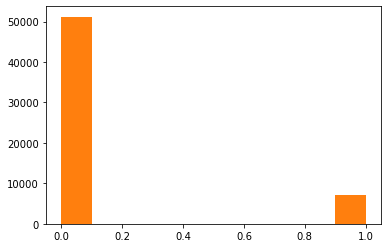

In [10]:
plt.hist(y_val)
plt.hist(y_train)

Mamy dobrze podzielone zbiory, czas się zająć tymi zmiennymi

array([[<AxesSubplot:title={'center':'MMRAcquisitionAuctionAveragePrice'}>,
        <AxesSubplot:title={'center':'MMRAcquisitionAuctionCleanPrice'}>,
        <AxesSubplot:title={'center':'MMRAcquisitionRetailAveragePrice'}>],
       [<AxesSubplot:title={'center':'MMRAcquisitonRetailCleanPrice'}>,
        <AxesSubplot:title={'center':'MMRCurrentAuctionAveragePrice'}>,
        <AxesSubplot:title={'center':'MMRCurrentAuctionCleanPrice'}>],
       [<AxesSubplot:title={'center':'MMRCurrentRetailAveragePrice'}>,
        <AxesSubplot:title={'center':'MMRCurrentRetailCleanPrice'}>,
        <AxesSubplot:title={'center':'BYRNO'}>],
       [<AxesSubplot:title={'center':'VehBCost'}>,
        <AxesSubplot:title={'center':'IsBadBuy'}>, <AxesSubplot:>]],
      dtype=object)

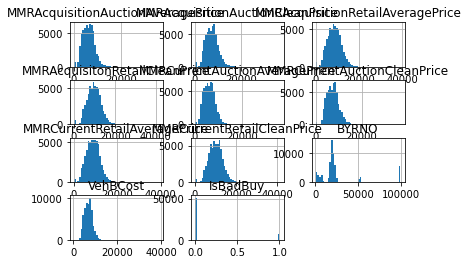

In [11]:
train.hist(bins=50)

<AxesSubplot:>

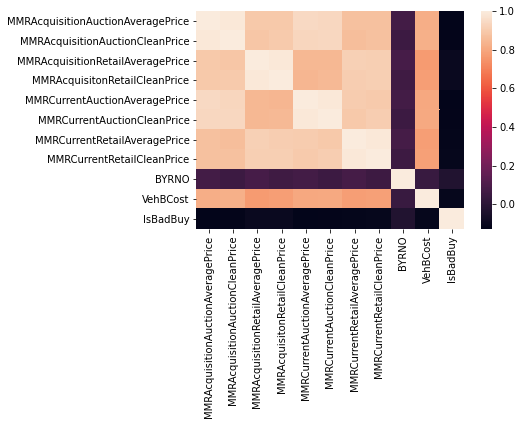

In [12]:
sns.heatmap(train.corr(method="spearman"))

### Ogólny typ kolumn
Wydaje się odpowiednio dobrany do wartości, całkiem mało braków danych, dobre dane - tak wyglądają.

train.IsBadBuy.mean()

### Color
Kolumna zawiera kolor sprzedawanego samochodu - dosyć oczywista sprawa, zmienna tekstowa

In [13]:
train.Color.value_counts() # calkiem sporo tych różnych kolorów, ciekawe czy to ma jakiekolwiek znaczenie dla targetu

train.groupby("Color")["IsBadBuy"].agg(["mean","count"]) # wygląda na to ze not avaiable color zwiększa szanse zlego zakupu, zas pomaranczowy kolor w dziwny sposob zmniejsza - ale jest tam dosyc malo danych

,mean,count
Color,,
BEIGE,0.136691,1251
BLACK,0.114407,6136
BLUE,0.115338,8254
BROWN,0.120690,348
GOLD,0.141266,4219
GREEN,0.121367,2546
GREY,0.117194,6229
MAROON,0.132167,1657
NOT AVAIL,0.273973,73


In [14]:
train.groupby("Color")["VehBCost"].agg(["mean","std", "count"]) # tutaj wygląda na to, że czarne samochody są droższe, niestandardowe kolory mają troche niższe ceny, pomarańczowe samochody śmierdzą

,mean,std,count
Color,,,
BEIGE,6764.352918,1741.754219,1251
BLACK,7154.083727,1770.273686,6136
BLUE,6735.370597,1681.578743,8254
BROWN,6897.758621,1758.532678,348
GOLD,6378.845342,1712.907140,4219
GREEN,6480.268928,1740.486676,2546
GREY,7082.077280,1821.793896,6229
MAROON,6632.641002,1866.358735,1657
NOT AVAIL,6494.726027,1611.303150,73


jeżeli chodzi o kolor wydaje mi się, że warto zwrócić uwagę na pomarańczowe samochody - coś tutaj jest niewporządku. Poza tym wydaje się, że ta kolumna nie niesie zbyt wiele informacji o zakupie

ale poniewaz kolumn jest malo, mozna zastosowac one hot encoding tak mysle

### Transmission

kolumna tekstowa opisuje czy auto jest manualem czy nie

In [15]:
train["Transmission"].unique()

train.groupby("Transmission").agg(["mean","count"])

MMRAcquisitionAuctionAveragePrice         \
                                          mean  count   
Transmission                                            
AUTO                               6175.657931  56319   
MANUAL                             4845.611845   2043   
Manual                             4816.000000      1   

             MMRAcquisitionAuctionCleanPrice         \
                                        mean  count   
Transmission                                          
AUTO                             7425.592411  56319   
MANUAL                           5958.657856   2043   
Manual                           5729.000000      1   

             MMRAcquisitionRetailAveragePrice         \
                                         mean  count   
Transmission                                           
AUTO                              8539.724640  56319   
MANUAL                            7288.016153   2043   
Manual                            8319.000000      1   

             MMRAcquisitonRetailCleanPrice         \
                                      mean  count   
Transmission                                        
AUTO                           9899.321969  56319   
MANUAL                         8514.380813   2043   
Manual                         9059.000000      1   

             MMRCurrentAuctionAveragePrice         ...  \
                                      mean  count  ...   
Transmission                                       ...   
AUTO                           6179.773889  56092  ...   
MANUAL                         4831.225711   2038  ...   
Manual                         5009.000000      1  ...   

             MMRCurrentRetailAveragePrice        MMRCurrentRetailCleanPrice  \
                                     mean  count                       mean   
Transmission                                                                  
AUTO                          8821.726913  56092               10196.567835   
MANUAL                        7467.103533   2038                8707.405299   
Manual                        8331.000000      1                9199.000000   

                            BYRNO            VehBCost         IsBadBuy         
              count          mean  count         mean  count      mean  count  
Transmission                                                                   
AUTO          56092  26653.510091  56335  6780.459622  56335  0.123174  56335  
MANUAL         2038  18942.432208   2043  5409.897699   2043  0.117964   2043  
Manual            1  18880.000000      1  3800.000000      1  0.000000      1  

[3 rows x 22 columns]

Wygląda na to, że transmission moze nie miec az tak duzego wplywu na zmienną, wpływ jest nieznaczny. Wystarczy zakodować zmienną jako 0 lub jeden.

Samochody o manualnej skrzyni biegów zdają się znacznie tańsze niż pozostałe.

### PRIMEUNIT
Czyli czy samochód jest bardziej premium i czy będzie na niego większe zapotrzebowanie

In [16]:
train["PRIMEUNIT"].isna().sum() 

55672

In [17]:
train.groupby("PRIMEUNIT").agg(["mean","count"])

MMRAcquisitionAuctionAveragePrice        \
                                       mean count   
PRIMEUNIT                                           
NO                              5586.009778  2659   
YES                            11217.629630    54   

          MMRAcquisitionAuctionCleanPrice        \
                                     mean count   
PRIMEUNIT                                         
NO                            6800.789395  2659   
YES                          13275.629630    54   

          MMRAcquisitionRetailAveragePrice        \
                                      mean count   
PRIMEUNIT                                          
NO                             9040.757052  2659   
YES                           15483.925926    54   

          MMRAcquisitonRetailCleanPrice       MMRCurrentAuctionAveragePrice  \
                                   mean count                          mean   
PRIMEUNIT                                                                     
NO                         10362.018428  2659                   6020.281509   
YES                        17567.777778    54                  11084.037037   

                 ... MMRCurrentRetailAveragePrice        \
          count  ...                         mean count   
PRIMEUNIT        ...                                      
NO         2650  ...                  9301.247925  2650   
YES          54  ...                 15316.370370    54   

          MMRCurrentRetailCleanPrice               BYRNO            VehBCost  \
                                mean count          mean count          mean   
PRIMEUNIT                                                                      
NO                      10742.036604  2650  27062.707519  2660   6524.269831   
YES                     17359.703704    54  22010.092593    54  11492.625556   

                 IsBadBuy        
          count      mean count  
PRIMEUNIT                        
NO         2660  0.037218  2660  
YES          54  0.092593    54  

[2 rows x 22 columns]

co ciekawe jezeli jest zaznaczone ze cos jest prime unit albo nie ma mniejszą szanse ze zostanie zlym zakupem. Dużo braków danych. Potrzebna będzie kolumna czy PRIMEUNIT jest nullem

### AUCGUART

kolumna opisuje czy zakup jest *chroniony?* przez sprzedawce - czy dobry czy niedobry jest to zakup przez sprzedającego 

In [18]:
train.loc[train["PRIMEUNIT"].isna()==False]["AUCGUART"].isna().sum() 

0

In [19]:
train.groupby("AUCGUART").agg(["mean","count"])

MMRAcquisitionAuctionAveragePrice        \
                                      mean count   
AUCGUART                                           
GREEN                          5749.552751  2654   
RED                            3383.711864    59   

         MMRAcquisitionAuctionCleanPrice        \
                                    mean count   
AUCGUART                                         
GREEN                        6986.227204  2654   
RED                          4385.355932    59   

         MMRAcquisitionRetailAveragePrice       MMRAcquisitonRetailCleanPrice  \
                                     mean count                          mean   
AUCGUART                                                                        
GREEN                         9230.912585  2654                  10573.166164   
RED                           6384.118644    59                   7459.050847   

               MMRCurrentAuctionAveragePrice        ...  \
         count                          mean count  ...   
AUCGUART                                            ...   
GREEN     2654                   6177.354253  2645  ...   
RED         59                   3613.254237    59  ...   

         MMRCurrentRetailAveragePrice       MMRCurrentRetailCleanPrice        \
                                 mean count                       mean count   
AUCGUART                                                                       
GREEN                     9483.890359  2645               10939.814745  2645   
RED                       6618.661017    59                7932.389831    59   

                 BYRNO           VehBCost        IsBadBuy        
                  mean count         mean count      mean count  
AUCGUART                                                         
GREEN     26907.091525  2655  6679.470633  2655  0.037288  2655  
RED       29441.000000    59  4087.542373    59  0.084746    59  

[2 rows x 22 columns]

In [20]:
train.groupby(["AUCGUART","PRIMEUNIT"]).agg(["mean","count"])

MMRAcquisitionAuctionAveragePrice        \
                                                mean count   
AUCGUART PRIMEUNIT                                           
GREEN    NO                              5635.985000  2600   
         YES                            11217.629630    54   
RED      NO                              3383.711864    59   

                   MMRAcquisitionAuctionCleanPrice        \
                                              mean count   
AUCGUART PRIMEUNIT                                         
GREEN    NO                            6855.601154  2600   
         YES                          13275.629630    54   
RED      NO                            4385.355932    59   

                   MMRAcquisitionRetailAveragePrice        \
                                               mean count   
AUCGUART PRIMEUNIT                                          
GREEN    NO                             9101.042308  2600   
         YES                           15483.925926    54   
RED      NO                             6384.118644    59   

                   MMRAcquisitonRetailCleanPrice        \
                                            mean count   
AUCGUART PRIMEUNIT                                       
GREEN    NO                         10427.893462  2600   
         YES                        17567.777778    54   
RED      NO                          7459.050847    59   

                   MMRCurrentAuctionAveragePrice        ...  \
                                            mean count  ...   
AUCGUART PRIMEUNIT                                      ...   
GREEN    NO                          6075.092242  2591  ...   
         YES                        11084.037037    54  ...   
RED      NO                          3613.254237    59  ...   

                   MMRCurrentRetailAveragePrice        \
                                           mean count   
AUCGUART PRIMEUNIT                                      
GREEN    NO                         9362.333462  2591   
         YES                       15316.370370    54   
RED      NO                         6618.661017    59   

                   MMRCurrentRetailCleanPrice               BYRNO        \
                                         mean count          mean count   
AUCGUART PRIMEUNIT                                                        
GREEN    NO                      10806.015438  2591  27008.759323  2601   
         YES                     17359.703704    54  22010.092593    54   
RED      NO                       7932.389831    59  29441.000000    59   

                        VehBCost        IsBadBuy        
                            mean count      mean count  
AUCGUART PRIMEUNIT                                      
GREEN    NO          6579.543541  2601  0.036140  2601  
         YES        11492.625556    54  0.092593    54  
RED      NO          4087.542373    59  0.084746    59  

[3 rows x 22 columns]

jezeli jest wpisany aucguart to primeunit tez. Mamy 3 możliwe wartości, ale nie ma w sumie tej środkowej - tzn YELLOW

### BYRNO

kolumna opisuje id kupującego

In [21]:
buyers = train.groupby("BYRNO").IsBadBuy.agg(["sum", "count", "mean"])

buyers["mean"].median() # sredni około 12.5% u kazdego kupującego jest cytryn

0.125

<AxesSubplot:xlabel='BYRNO'>

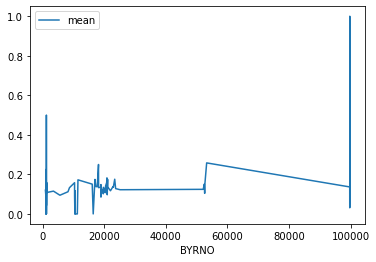

In [22]:
train.groupby("BYRNO").IsBadBuy.agg(["mean"]).plot()

In [23]:
train[["BYRNO", "IsBadBuy"]].corr() # w teorii brak korelacji

# wobec tego wydaje mi sie ze mozna wywalić kupującego - nieistotna kolumna

,BYRNO,IsBadBuy
BYRNO,1.000000,-0.059795
IsBadBuy,-0.059795,1.000000


### MMR Columns

one tutaj opisują ceny danego auta w różnych momentach i na różnych rynkach. Podobne do VehBCost - ceny samochodu na sprzedaż

<AxesSubplot:>

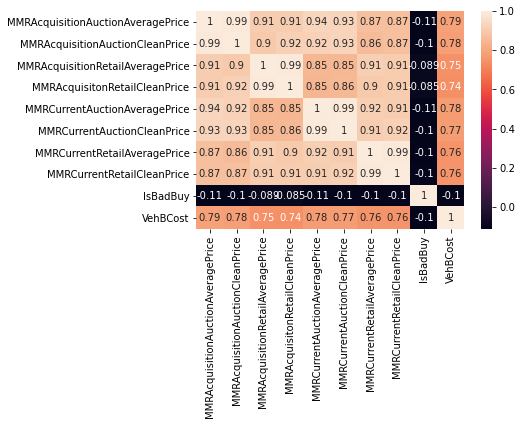

In [24]:
MMR_train = train.iloc[:, 2:10].join(train["IsBadBuy"]).join(train["VehBCost"])

sns.heatmap(MMR_train.corr(), annot=True)

okazują sie bardzo mocno skorelowane - wydaje mi sie ze wystarczą najwyzej dwie z nich: *MMRAcquisitionAuctionAveragePrice* oraz *MMRCurrentAuctionAveragePrice* pozostałe są praktycznie identyczne

In [25]:
train.groupby(["IsBadBuy"]).mean() # ciekawe jest to, że bad buys ma zarówno niższe ceny na rynkach jak i te ceny zakupu

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost
IsBadBuy,,,,,,,,,,
0,6230.727955,7480.235905,8600.276949,9958.159211,6232.29488,7496.538093,8895.038858,10269.360279,26960.490050,6800.009247
1,5402.810167,6616.652368,7748.777298,9082.449582,5420.13663,6641.296172,7911.038698,9251.019698,22274.556329,6249.323953


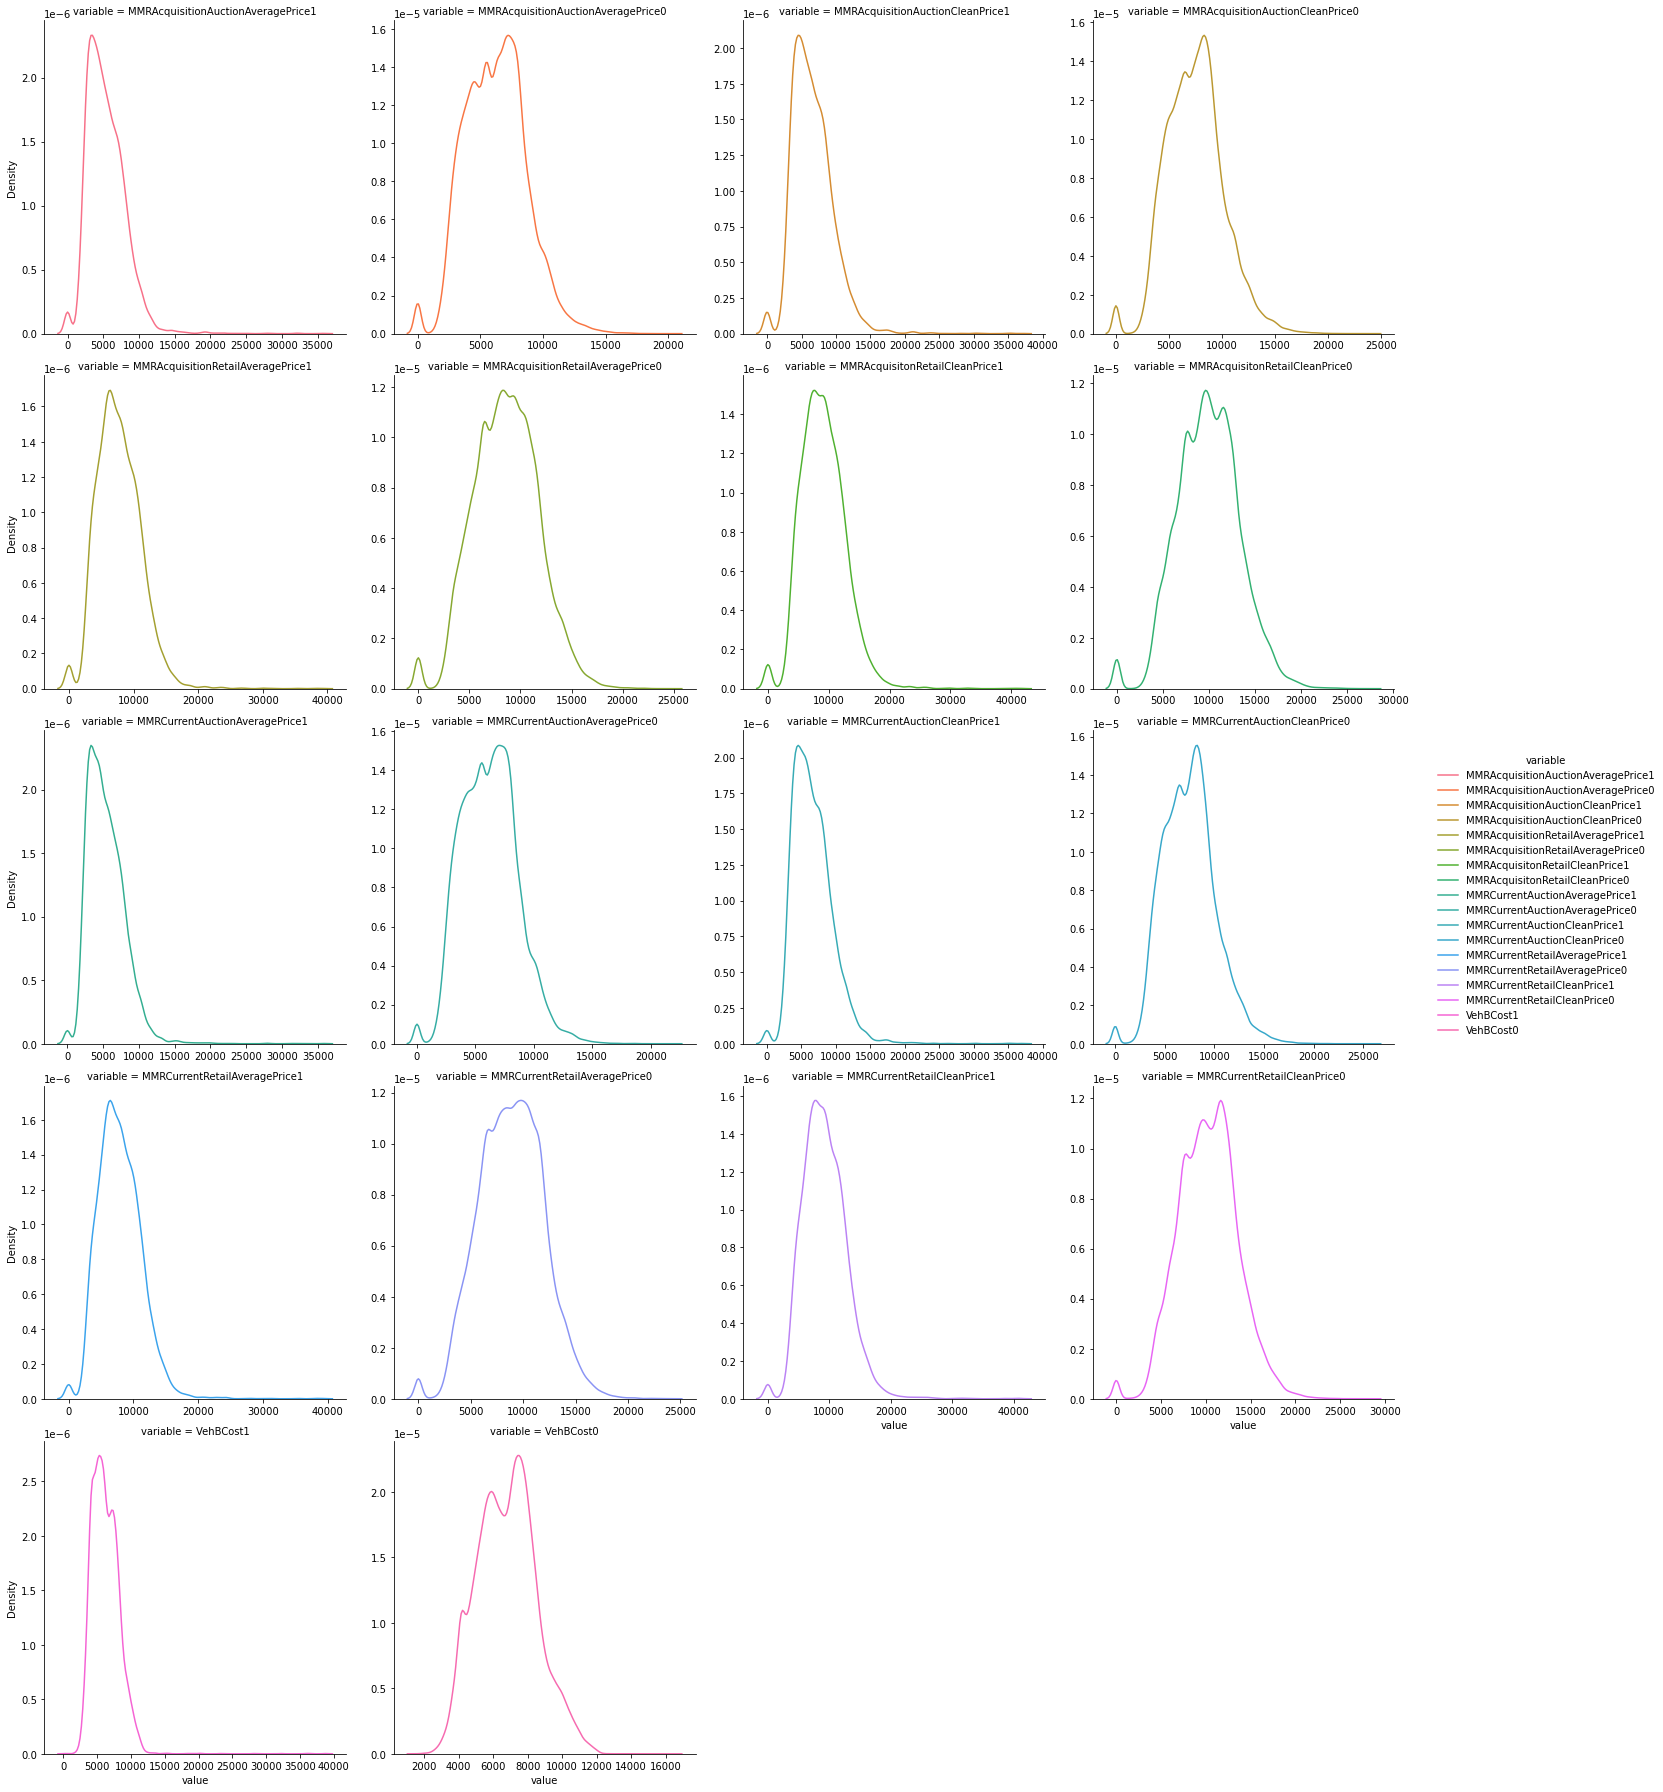

In [26]:
MMR_melt = MMR_train.melt(id_vars=['IsBadBuy'])

MMR_melt["variable"] = MMR_melt["variable"] + MMR_melt["IsBadBuy"].astype("str")

sns.displot(kind='kde', data=MMR_melt, col='variable', col_wrap=4, x='value', hue="variable", facet_kws={'sharey': False, 'sharex': False}) # wszystkie te wykresy wydają podobnie

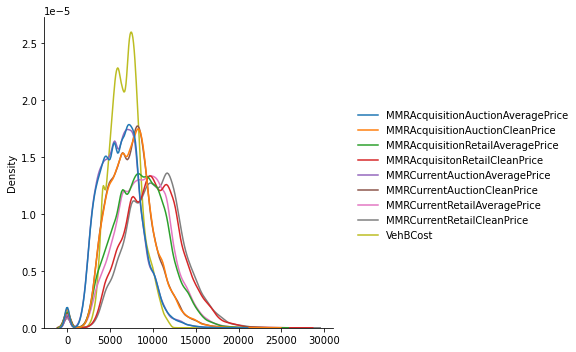

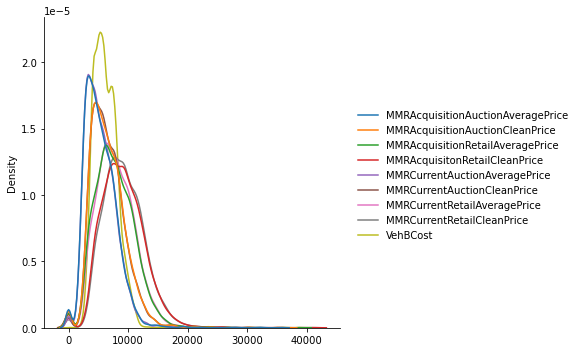

In [27]:
sns.displot(MMR_train.loc[MMR_train["IsBadBuy"]==0].loc[:, MMR_train.columns != "IsBadBuy"], kind="kde")
sns.displot(MMR_train.loc[MMR_train["IsBadBuy"]==1].loc[:, MMR_train.columns != "IsBadBuy"], kind="kde")
# bardzo duże powiązania między zmiennymi - tylko VehBCost sie wyróżnia 

te zmienne są bardzo skorelowane, istotne wydają się tylko dwie z nich, brak danych do poprawy - wartość 0 jest do zaimputowaniam wygląda to jak tendencyjny brak danych a nie naturalna cena

# Data processing

### Color

In [28]:
# na razie damy tylko kolumne czy jest bardziej niebezpieczna czy nie

color_train = train.groupby("Color")["IsBadBuy"].agg(["mean"]) 

max_mean_color = color_train["mean"].max()
color_dict = color_train["mean"].to_dict()
train["ColorDanger"] = train["Color"].map(color_dict).fillna(train.IsBadBuy.mean())/max_mean_color
bad_colors = list(color_train.loc[color_train["mean"] > train.IsBadBuy.mean()].index)

train['DangerousColor'] = np.where(train["Color"].isin(bad_colors), 1, 0)

In [29]:
train[["ColorDanger", "Color"]].describe()

,ColorDanger
count,58386.000000
mean,0.448904
std,0.035550
min,0.293678
25%,0.420984
50%,0.447139
75%,0.456109
max,1.000000


In [30]:
color_dict

{'BEIGE': 0.1366906474820144,
 'BLACK': 0.11440677966101695,
 'BLUE': 0.11533801793070027,
 'BROWN': 0.1206896551724138,
 'GOLD': 0.141265702773169,
 'GREEN': 0.12136684996072271,
 'GREY': 0.11719377107079788,
 'MAROON': 0.13216656608328303,
 'NOT AVAIL': 0.273972602739726,
 'ORANGE': 0.08045977011494253,
 'OTHER': 0.12060301507537688,
 'PURPLE': 0.13071895424836602,
 'RED': 0.12998405103668262,
 'SILVER': 0.12250377580130895,
 'WHITE': 0.12496130430296151,
 'YELLOW': 0.12698412698412698}

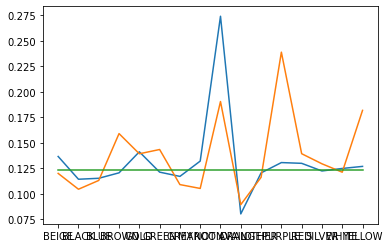

In [31]:
color_val = val.groupby("Color")["IsBadBuy"].agg(["mean"])
color = color_val.join(color_train, lsuffix="_val", rsuffix="_train")
color["mean"] = train.IsBadBuy.mean()
plt.plot(color.index, color["mean_train"])
plt.plot(color.index, color["mean_val"])
plt.plot(color.index, color["mean"])

plt.show()

In [32]:

val["ColorDanger"] = val["Color"].map(color_dict).fillna(train.IsBadBuy.mean()).astype("float")
val[["IsBadBuy",  "ColorDanger"]].corr()

,IsBadBuy,ColorDanger
IsBadBuy,1.00000,0.02619
ColorDanger,0.02619,1.00000


### Transmission

In [33]:
transmission_dict = {'AUTO':0, 'MANUAL':1}

train['Transmission'] = train['Transmission'].str.upper().map(transmission_dict)

### AUCGUART i PRIMEUNIT

In [34]:
train["IsPrimeunitNA"] = np.where(train["PRIMEUNIT"].isna(), 1, 0)

primeunit_dict = {'NO':0, 'YES':1, float("nan"):0} # nie jestem pewien czy nie lepiej bedzie zamienic na odwrot
train['PRIMEUNIT'] = train['PRIMEUNIT'].str.upper().map(primeunit_dict)


aucguart_dict = {'GREEN':2, 'YELLOW':1, "RED":0, float("nan"):0}
train['AUCGUART'] = train['AUCGUART'].str.upper().map(aucguart_dict)

In [35]:
train = train.drop(columns=["BYRNO"])

### MMR Columns

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58386 entries, 11971 to 57086
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Color                              58380 non-null  object 
 1   Transmission                       58379 non-null  float64
 2   MMRAcquisitionAuctionAveragePrice  58370 non-null  float64
 3   MMRAcquisitionAuctionCleanPrice    58370 non-null  float64
 4   MMRAcquisitionRetailAveragePrice   58370 non-null  float64
 5   MMRAcquisitonRetailCleanPrice      58370 non-null  float64
 6   MMRCurrentAuctionAveragePrice      58138 non-null  float64
 7   MMRCurrentAuctionCleanPrice        58138 non-null  float64
 8   MMRCurrentRetailAveragePrice       58138 non-null  float64
 9   MMRCurrentRetailCleanPrice         58138 non-null  float64
 10  PRIMEUNIT                          58386 non-null  int64  
 11  AUCGUART                           58386 non-null 

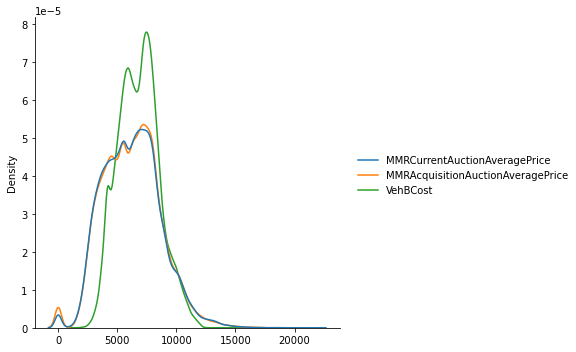

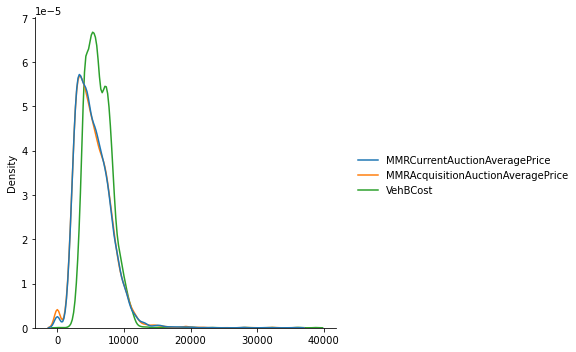

In [37]:
MMR_train = train[["MMRCurrentAuctionAveragePrice", "MMRAcquisitionAuctionAveragePrice", "VehBCost", "IsBadBuy"]]
sns.displot(MMR_train.loc[MMR_train["IsBadBuy"]==0].loc[:, MMR_train.columns != "IsBadBuy"], kind="kde")
sns.displot(MMR_train.loc[MMR_train["IsBadBuy"]==1].loc[:, MMR_train.columns != "IsBadBuy"], kind="kde")

In [52]:
train[["MMRCurrentAuctionAveragePrice", "MMRAcquisitionAuctionAveragePrice", "VehBCost"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58386 entries, 11971 to 57086
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MMRCurrentAuctionAveragePrice      58386 non-null  float64
 1   MMRAcquisitionAuctionAveragePrice  58386 non-null  float64
 2   VehBCost                           58386 non-null  float64
dtypes: float64(3)
memory usage: 3.8 MB


In [50]:
# zaimputujemy sobie wartość 0 dla kolumn MMRCurrentAuctionAveragePrice oraz MMRAcquisitionAuctionAveragePrice
# pozostałe wywalamy
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train["MMRCurrentAuctionAveragePrice"] = np.where(train["MMRCurrentAuctionAveragePrice"] == 0, np.nan, train["MMRCurrentAuctionAveragePrice"])
train["MMRAcquisitionAuctionAveragePrice"] = np.where(train["MMRAcquisitionAuctionAveragePrice"] == 0, np.nan, train["MMRAcquisitionAuctionAveragePrice"])

imp_mean = IterativeImputer(random_state=0)

MMR_columns = ["MMRCurrentAuctionAveragePrice", "MMRAcquisitionAuctionAveragePrice", "VehBCost"]

imp_mean.fit(train[["MMRCurrentAuctionAveragePrice", "MMRAcquisitionAuctionAveragePrice", "VehBCost"]])

MMR_train_transformed = imp_mean.transform(train[["MMRCurrentAuctionAveragePrice", "MMRAcquisitionAuctionAveragePrice", "VehBCost"]])
MMR_train_transformed = pd.DataFrame(MMR_train_transformed, columns = ["MMRCurrentAuctionAveragePrice", "MMRAcquisitionAuctionAveragePrice", "VehBCost"])
MMR_train_transformed.index = train.index
MMR_train_transformed = MMR_train_transformed.join(train["IsBadBuy"])
MMR_train_transformed

,MMRCurrentAuctionAveragePrice,MMRAcquisitionAuctionAveragePrice,VehBCost,IsBadBuy
11971,9962.000000,9962.00000,8880.0,1
8084,4953.000000,4154.00000,6300.0,1
49669,3716.000000,3716.00000,4170.0,0
41764,3930.000000,4293.00000,6235.0,0
59440,4853.000000,6612.00000,7565.0,1
...,...,...,...,...
22569,8529.000000,8168.00000,6470.0,0
41811,3769.000000,3720.00000,5935.0,0
67791,6346.000000,5560.00000,7130.0,0
40656,5345.000000,5512.00000,8370.0,0


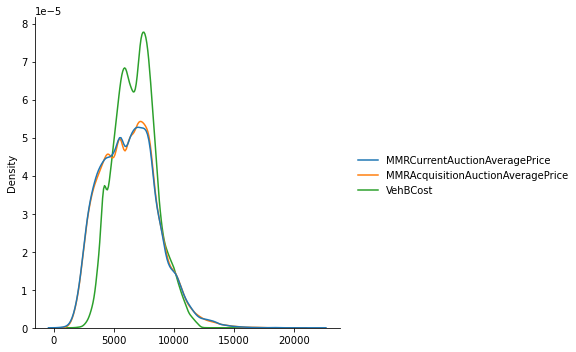

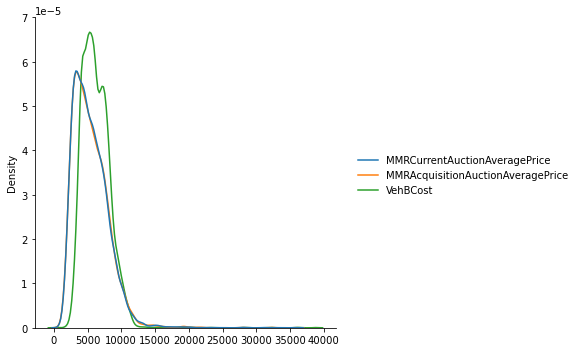

In [39]:
sns.displot(MMR_train_transformed.loc[MMR_train_transformed["IsBadBuy"]==0].loc[:, MMR_train_transformed.columns != "IsBadBuy"], kind="kde")
sns.displot(MMR_train_transformed.loc[MMR_train_transformed["IsBadBuy"]==1].loc[:, MMR_train_transformed.columns != "IsBadBuy"], kind="kde")
# bardzo duże powiązania między zmiennymi - tylko VehBCost sie wyróżnia 

In [40]:
train_bad_buy_mean = train.IsBadBuy.mean()

In [41]:

def encode_categorical(df):
    df["ColorDanger"] = df["Color"].map(color_dict).fillna(train_bad_buy_mean)/max_mean_color # no takie w miare to jest średnie
    #df['DangerousColor'] = np.where(df["Color"].isin(bad_colors), 1, 0)

    df["IsPrimeunitNA"] = np.where(df["PRIMEUNIT"].isna(), 1, 0) # to moze byc niepotrzebne
    primeunit_dict = {'NO':0, 'YES':1, float("nan"):0} # nie jestem pewien czy nie lepiej bedzie zamienic na odwrot
    df['PRIMEUNIT'] = df['PRIMEUNIT'].str.upper().map(primeunit_dict)
    aucguart_dict = {'GREEN':2, 'YELLOW':1, "RED":0, float("nan"):0}
    df['AUCGUART'] = df['AUCGUART'].str.upper().map(aucguart_dict)

    transmission_dict = {'AUTO':0, 'MANUAL':1}
    df['Transmission'] = df['Transmission'].str.upper().map(transmission_dict)
    df["Transmission"] = df["Transmission"].fillna(df["Transmission"].median())

    df = df.drop(columns=["BYRNO", "Color"])

    print("Categorical columns transformed.")

    return df

def impute_MMR(df):

    # zamieniamy 0 na nan    
    df["MMRCurrentAuctionAveragePrice"] = np.where(df["MMRCurrentAuctionAveragePrice"] == 0, np.nan, df["MMRCurrentAuctionAveragePrice"])
    df["MMRAcquisitionAuctionAveragePrice"] = np.where(df["MMRAcquisitionAuctionAveragePrice"] == 0, np.nan, df["MMRAcquisitionAuctionAveragePrice"])

    MMR_df = imp_mean.transform(df[["MMRCurrentAuctionAveragePrice", "MMRAcquisitionAuctionAveragePrice", "VehBCost"]])
    MMR_df = pd.DataFrame(MMR_df, columns = ["MMRCurrentAuctionAveragePrice", "MMRAcquisitionAuctionAveragePrice", "VehBCost"])
    MMR_df.index = df.index
    df["MMRCurrentAuctionAveragePrice"] = MMR_df["MMRCurrentAuctionAveragePrice"]
    df["MMRAcquisitionAuctionAveragePrice"] = MMR_df["MMRAcquisitionAuctionAveragePrice"]

    df = df.drop(columns = ["MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitonRetailCleanPrice", 
                            "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice"]) 
    
    # tutaj moze tez MMRAcquisitionAuctionAveragePrice

    print("MMR Columns imputed.")
    return df

## Pipe

wczytamy sobie raz jeszcze

In [42]:
train_df = pd.read_csv('training.csv') # split for test and train set is ready
test = pd.read_csv('test.csv')

In [43]:
my_columns = [1,10,11]+(list(range(18, 29))) + [31]
df = train_df.iloc[:,my_columns]

y = df["IsBadBuy"]
X = df.copy()

del X["IsBadBuy"]

In [44]:
test_columns = [9,10]+(list(range(17, 28))) + [30]
X_test = test.iloc[:, test_columns].copy()
X_test

,Color,Transmission,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VehBCost
0,SILVER,AUTO,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,6500.0
1,SILVER,AUTO,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,6300.0
2,SILVER,AUTO,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,9700.0
3,GOLD,AUTO,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,4150.0
4,BLUE,AUTO,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,4100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,BLACK,AUTO,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,7955.0
48703,GREEN,AUTO,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,7035.0
48704,BLACK,AUTO,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,6335.0
48705,SILVER,AUTO,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,8055.0


In [45]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


train = X_train.join(y_train)
val = X_val.join(y_val)

In [46]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

categorical_transformer = FunctionTransformer(encode_categorical)
MMR_imputer = FunctionTransformer(impute_MMR)

# all the afore declared processings applied
prepipe = Pipeline([
    ("transform_categorical", categorical_transformer),
    ("MMR_imputing", MMR_imputer)
])

In [47]:
train = prepipe.fit_transform(train)

Categorical columns transformed.
MMR Columns imputed.


<AxesSubplot:>

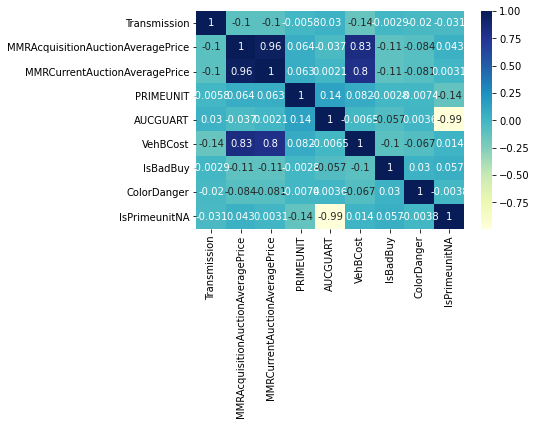

In [97]:
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58386 entries, 11971 to 57086
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Transmission                       58386 non-null  float64
 1   MMRAcquisitionAuctionAveragePrice  58386 non-null  float64
 2   MMRCurrentAuctionAveragePrice      58386 non-null  float64
 3   PRIMEUNIT                          58386 non-null  int64  
 4   AUCGUART                           58386 non-null  int64  
 5   VehBCost                           58386 non-null  float64
 6   IsBadBuy                           58386 non-null  int64  
 7   ColorDanger                        58386 non-null  float64
 8   IsPrimeunitNA                      58386 non-null  int32  
dtypes: float64(5), int32(1), int64(3)
memory usage: 6.2 MB


In [99]:
# training dataset
y = train['IsBadBuy']
del train['IsBadBuy']
y_train = y
X_train = train

In [100]:
# validation dataset
val = prepipe.transform(val)
X_val = val
y_val = val["IsBadBuy"]
del X_val["IsBadBuy"]

Categorical columns transformed.
MMR Columns imputed.


# Model

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
y_pred = rf_model.predict(X_val)

In [105]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     14464
           1       0.03      0.38      0.05       133

    accuracy                           0.87     14597
   macro avg       0.51      0.63      0.49     14597
weighted avg       0.98      0.87      0.92     14597



In [106]:
confusion_matrix(y_val, y_pred)

array([[12719,    83],
       [ 1745,    50]], dtype=int64)

In [107]:
X_test = prepipe.transform(X_test)

Categorical columns transformed.
MMR Columns imputed.


In [108]:
X_test

,Transmission,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,ColorDanger,IsPrimeunitNA
0,0.0,5032.0,4905.0,0,0,6500.0,0.447139,1
1,0.0,4502.0,4645.0,0,0,6300.0,0.447139,1
2,0.0,10244.0,10883.0,0,0,9700.0,0.447139,1
3,0.0,2558.0,2928.0,0,0,4150.0,0.515620,1
4,0.0,5013.0,5013.0,0,0,4100.0,0.420984,1
...,...,...,...,...,...,...,...,...
48702,0.0,5358.0,5761.0,0,0,7955.0,0.417585,1
48703,0.0,6849.0,6856.0,0,0,7035.0,0.442989,1
48704,0.0,4662.0,4833.0,0,2,6335.0,0.417585,0
48705,0.0,5953.0,5092.0,0,2,8055.0,0.447139,0


In [109]:
y = rf_model.predict(X_test)

In [110]:
pd.DataFrame(y, columns=["IsBadBuy"]).join(test["RefId"]).to_csv("out.csv", index=False)

# super model

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier

c:\Users\tymot\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [112]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

In [113]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   n_jobs=-1)

In [114]:
y_pred = model.predict(X_val)
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     14545
           1       0.01      0.40      0.02        52

    accuracy                           0.88     14597
   macro avg       0.50      0.64      0.48     14597
weighted avg       0.99      0.88      0.93     14597



In [115]:
confusion_matrix(y_val, y_pred)

array([[12771,    31],
       [ 1774,    21]], dtype=int64)

In [117]:
y = model.predict(X_test)

In [ ]:
pd.DataFrame(y, columns=["IsBadBuy"]).join(test["RefId"]).to_csv("out.csv", index=False)